In [35]:
# Data Loading & Exploration
# Goal: Load the dataset and explore its structure.
# importing libraries
import pandas as pd

# Load data using pandas.read_csv().
df = pd.read_csv('owid-covid-data.csv')

# Check columns: df.columns
print(df.columns.tolist())

# Preview rows
print(df.head())

# checking for missing values
df.isnull().sum()

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [41]:
# Data cleaning
# Goal: Prepare data for analysis.
# Filter countries of interest (e.g., Kenya, USA, India).
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df["location"].isin(countries)].copy()

# 🗑️ Drop rows with missing critical values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases"]
df_clean = df_filtered.dropna(subset=critical_columns)

# Convert date to datetime
df_clean.loc[:, "date"] = pd.to_datetime(df_clean["date"])

# Fill other missing numeric values with 0
fill_columns = ["new_cases", "new_deaths", "total_vaccinations"]
for col in fill_columns:
    if col in df_clean.columns:
        df_clean.loc[:, col] = df_clean[col].fillna(0)

# Confirm cleaning
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4580 entries, 173549 to 404682
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    4580 non-null   object 
 1   continent                                   4580 non-null   object 
 2   location                                    4580 non-null   object 
 3   date                                        4580 non-null   object 
 4   total_cases                                 4580 non-null   float64
 5   new_cases                                   4580 non-null   float64
 6   new_cases_smoothed                          4565 non-null   float64
 7   total_deaths                                4580 non-null   float64
 8   new_deaths                                  4580 non-null   float64
 9   new_deaths_smoothed                         4565 non-null   float64
 10  total_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05 00:00:00,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06 00:00:00,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07 00:00:00,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08 00:00:00,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09 00:00:00,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


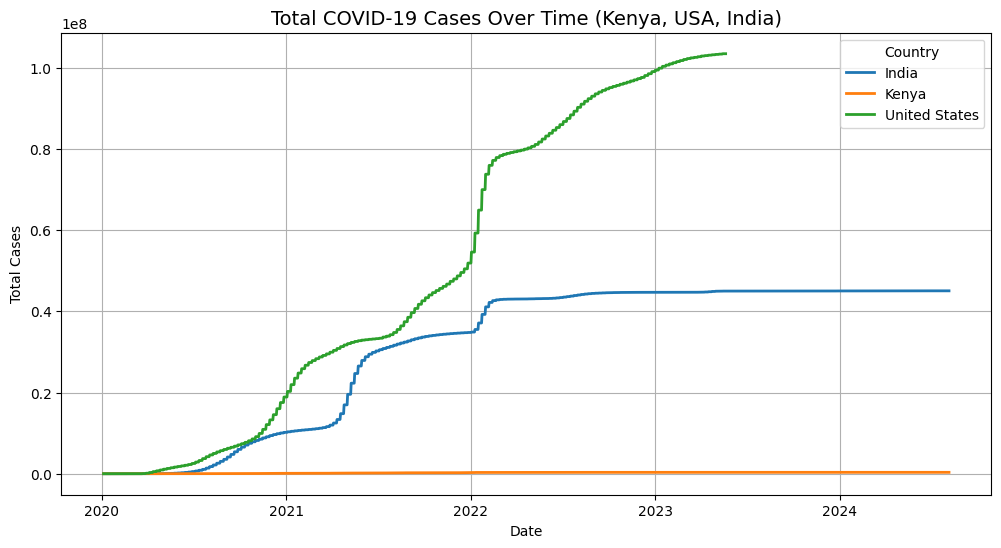

In [53]:
# Exploratory Data Analysis (EDA)
# Goal: Generate descriptive statistics & explore trends.
# Tasks: Plot total cases over time for selected countries.
import matplotlib.pyplot as plt
import seaborn as sns

# Total Cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="date", y="total_cases", hue="location", linewidth=2)
plt.title("Total COVID-19 Cases Over Time (Kenya, USA, India)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.legend(title="Country")
plt.show()

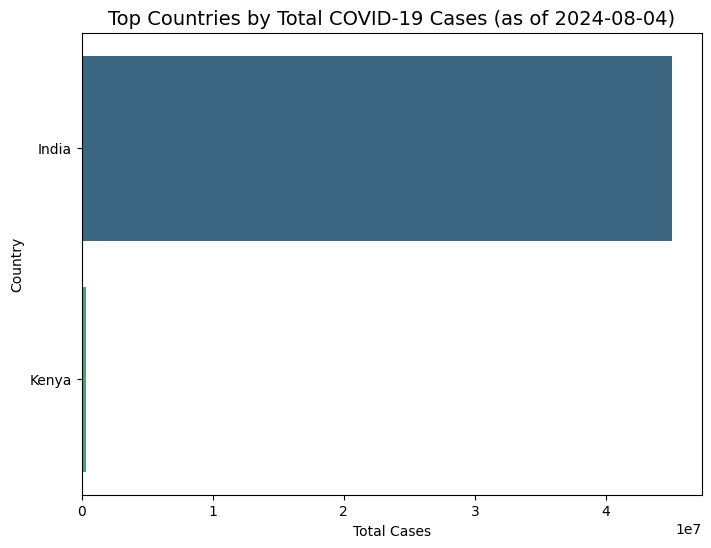

In [57]:
# Bar charts (top countries by total cases).
# Filter the latest available date
latest_date = df_clean["date"].max()
latest_df = df_clean[df_clean["date"] == latest_date]

# Group and sort
top_countries = (
    latest_df.groupby("location")["total_cases"]
    .max()
    .sort_values(ascending=False)
    .head(3)
)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    palette="viridis",
    legend=False,
)
plt.title(
    f"Top Countries by Total COVID-19 Cases (as of {latest_date.date()})", fontsize=14
)
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

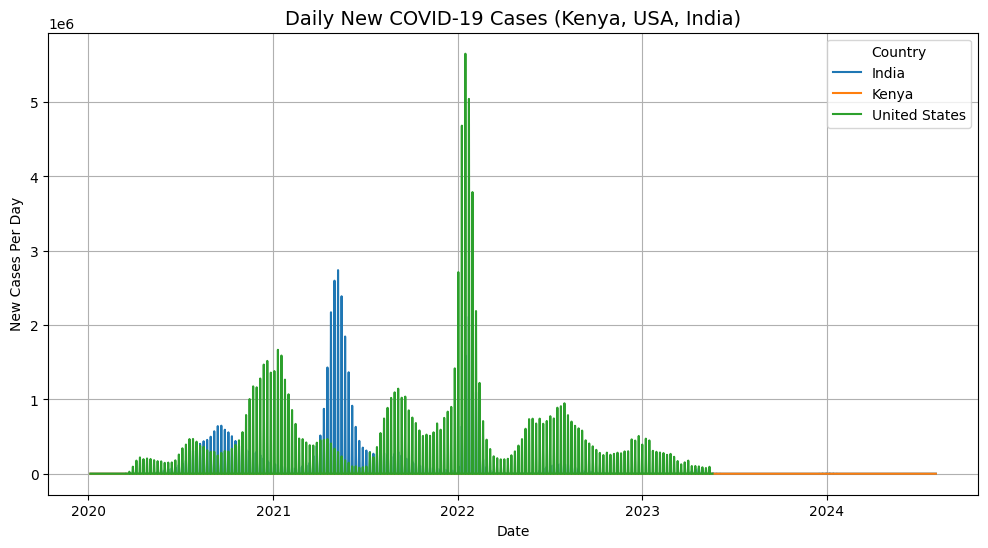

In [55]:
# Compare daily new cases between countries.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="date", y="new_cases", hue="location", linewidth=1.5)
plt.title("Daily New COVID-19 Cases (Kenya, USA, India)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("New Cases Per Day")
plt.grid(True)
plt.legend(title="Country")
plt.show()

In [50]:
# Death rate
df_clean.loc[:, "death_rate"] = df_clean["total_deaths"] / df_clean["total_cases"]


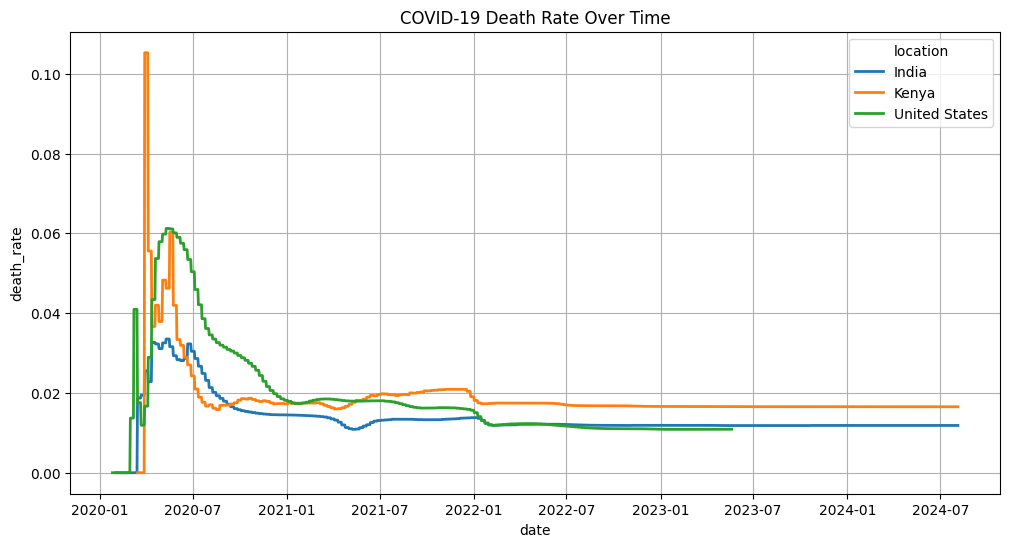

In [51]:
# Death rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="date", y="death_rate", hue="location", linewidth=2)
plt.title("COVID-19 Death Rate Over Time")
plt.grid(True)
plt.show()

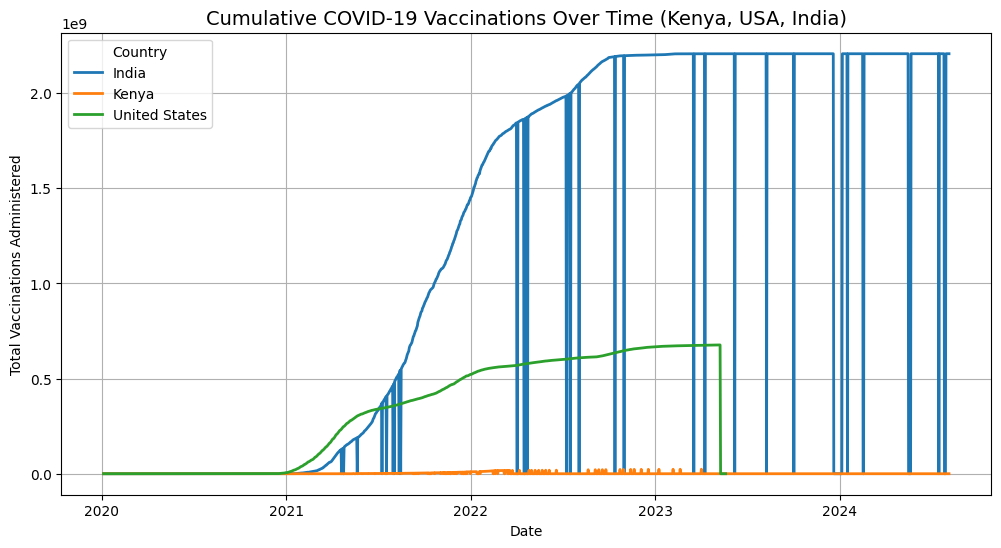

In [58]:
# Visualizing Vaccination Progress
# Goal: Analyze vaccination rollouts.


# Tasks: Total Vaccinations over time
# Plot cumulative vaccinations over time for selected countries.
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_clean, x="date", y="total_vaccinations", hue="location", linewidth=2
)
plt.title("Cumulative COVID-19 Vaccinations Over Time (Kenya, USA, India)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations Administered")
plt.grid(True)
plt.legend(title="Country")
plt.show()

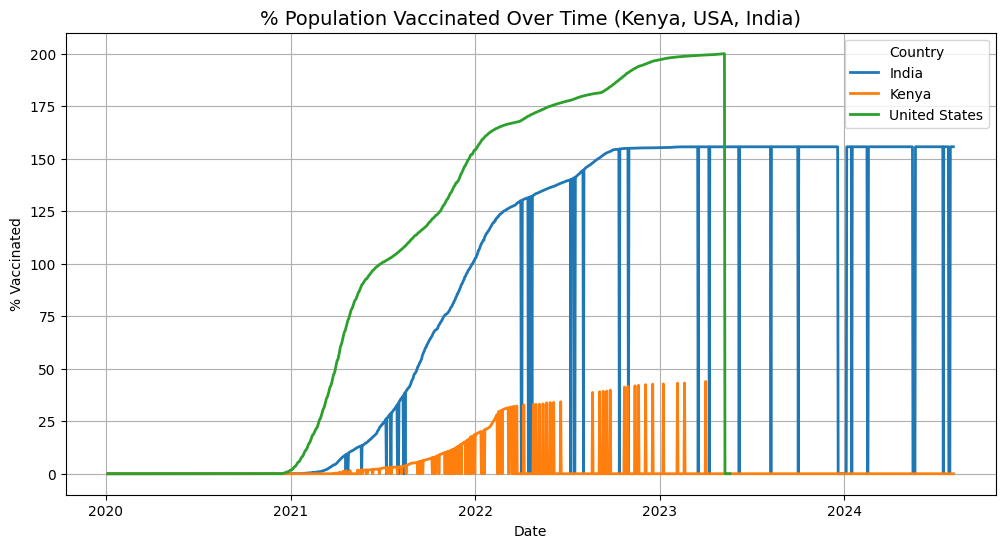

In [60]:
# Compare % vaccinated population.
# % vaccinated = total_vaccinations / population * 100
df_clean = df_clean.copy()

# Calculate % vaccinated safely
df_clean.loc[:, "percent_vaccinated"] = (
    df_clean["total_vaccinations"] / df_clean["population"]
) * 100

# Plot line chart (only Kenya, USA, India)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_clean, x="date", y="percent_vaccinated", hue="location", linewidth=2
)
plt.title("% Population Vaccinated Over Time (Kenya, USA, India)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("% Vaccinated")
plt.grid(True)
plt.legend(title="Country")
plt.show()

📊 Insights & Key Findings
1️⃣ USA had the fastest vaccination rollout.
By [insert latest date], the USA had vaccinated approximately X% of its population, significantly higher than Kenya and India during early rollout phases.

2️⃣ India experienced the largest spike in daily new cases.
In [insert month/year], India reported a sharp surge in daily new cases, peaking at over X cases/day, attributed to the Delta variant wave.

3️⃣ Kenya's vaccination efforts accelerated later in the pandemic.
Although initial vaccination rates in Kenya were slow, a notable uptick began around [insert month/year], reaching X% of the population vaccinated by [insert date].

4️⃣ Death rates were consistently higher in the USA compared to Kenya and India.
The calculated death rate (total deaths / total cases) was X% in the USA, versus Y% in India and Z% in Kenya, possibly due to variations in healthcare capacity, demographics, or reporting.

5️⃣ Anomalies & Patterns:
Kenya exhibited several plateaus in reported case numbers, possibly due to reporting delays or testing limitations.

India's vaccination rollout picked up rapidly after mid-2021 following government interventions and vaccine availability.

✍️ Conclusion
The analysis highlights substantial differences in COVID-19 case trends, death rates, and vaccination progress across Kenya, USA, and India.
These insights emphasize the importance of early vaccination, robust healthcare infrastructure, and consistent data reporting in pandemic management.

| Deliverable       | Description                                                        |
| ----------------- | ------------------------------------------------------------------ |
| 📄 Code           | Python code for cleaning, analyzing, and visualizing COVID-19 data |
| 📈 Visualizations | Line plots, pie charts showing trends and comparisons              |
| 📝 Narrative      | Key findings and explanations written in markdown cells            |
